In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from IPython.display import HTML, Latex, Markdown, Pretty

from windIO.Plant import WTLayout
from fusedwake.WindFarm import WindFarm

from fusedwake.gcl import GCL
import fusedwake.gcl.fortran as fgcl
import fusedwake.gcl.python as pygcl

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def circles(x, y, s, c='b', vmin=None, vmax=None,**kwargs):
    """
    Make a scatter of circles plot of x vs y, where x and y are sequence 
    like objects of the same lengths. The size of circles are in data scale.

    Parameters
    ----------
    x,y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, ) 
        Radius of circle in data unit.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence 
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)  
        `c` can be a 2-D array in which the rows are RGB or RGBA, however. 
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls), 
        norm, cmap, transform, etc.

    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`

    Examples
    --------
    a = np.arange(11)
    circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')
    plt.colorbar()

    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    
    (http://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    from matplotlib.collections import PatchCollection

    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

In [3]:
#filename = 'middelgrunden.yml'
#filename = 'lillgrund.yml'
#filename = 'hornsrev.yml'

#filename = 'test_WF.yml'
#filename = 'test_WF_4.yml'
filename = 'test_WF_4Turbines.yml'

#wtl = WTLayout(filename)
wf = WindFarm(yml=filename)

In [4]:
# Fixed parameters
a1 = 0.435449861
a2 = 0.797853685
a3 = -0.124807893
a4 = 0.136821858
b1 = 15.6298
b2 = 1.0

# Variables
D = 80.0
CT = 0.98
TI = 0.10


print np.allclose(fgcl.get_r96(D, CT, TI, a1, a2, a3, a4, b1, b2),
                  pygcl.get_r96(D, CT, TI, pars=[a1, a2, a3, a4, b1, b2]))

R = D/2.
x=4.*D
r=0.*R

print [np.allclose(fgcl.get_rw(x, D, CT, TI, a1, a2, a3, a4, b1, b2)[i],
                  pygcl.get_Rw(x, R, TI, CT, pars=[a1, a2, a3, a4, b1, b2])[i]) for i in range(3)]

print np.allclose(fgcl.get_du(x,r,D,CT, TI, a1, a2, a3, a4, b1, b2),
                  pygcl.get_dU(x,r,R, CT, TI, pars=[a1, a2, a3, a4, b1, b2]))

R = D/2.
x=D*np.linspace(0.,10.,100)
r=0.*R*np.ones_like(x)

print [np.allclose(fgcl.get_rw(x, D, CT, TI, a1, a2, a3, a4, b1, b2)[i],
                  pygcl.get_Rw(x, R, TI, CT, pars=[a1, a2, a3, a4, b1, b2])[i]) for i in range(3)]

print np.allclose(fgcl.get_du(x,r,D,CT, TI, a1, a2, a3, a4, b1, b2),
                  pygcl.get_dU(x,r,R, CT, TI, pars=[a1, a2, a3, a4, b1, b2]))


R = D/2.
x=D*np.linspace(0.,10.,100)
r=D*np.linspace(0.,2.,100) 

print np.allclose(fgcl.get_du(x,r,D,CT, TI, a1, a2, a3, a4, b1, b2),
                  pygcl.get_dU(x,r,R, CT, TI, pars=[a1, a2, a3, a4, b1, b2]))


dx = 7.*D
dy = 6.*D
dz = -2.*D
# Wake operating turbine
RT = 2.*R
DT = 2.*RT

print np.allclose(fgcl.get_dueq(dx,dy,dz,DT,D,CT,TI,a1,a2,a3,a4,b1,b2),
                  pygcl.get_dUeq(dx,dy,dz,RT,R,CT,TI,pars=[a1, a2, a3, a4, b1, b2]))


dx = np.array([6.,10.,15.])*D
dy = np.array([1.,-5.,0.])*D
dz = np.array([-2,2.,1.])*D

# Wake operating turbines
Rop = np.array([1.,2.,.5])*D 
Dop = 2.*Rop

print np.allclose(fgcl.get_dueq(dx,dy,dz,Dop,D,CT,TI,a1,a2,a3,a4,b1,b2),
                  pygcl.get_dUeq(dx,dy,dz,Rop,R,CT,TI,pars=[a1, a2, a3, a4, b1, b2]))


True
[True, True, True]
True
[True, True, True]
True
True
True
True


In [5]:
gcl = GCL(WF=wf)

In [6]:
# Inputs
WS=10.0*np.ones([wf.nWT])
WD=271.*np.ones([wf.nWT])#np.random.normal(270.,30.)*np.ones([wf.nWT])#
TI=0.1*np.ones([wf.nWT])

print np.mean(WD)

271.0


(-50, 1000)

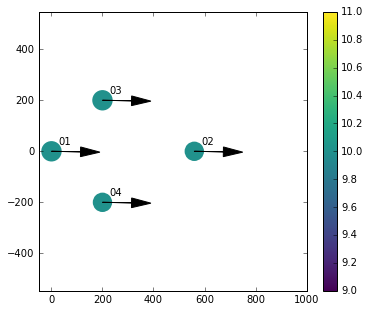

In [7]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=WS, 
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
    ax.arrow(x=wf.xyz[0,i],
          y=wf.xyz[1,i],
          dx=0.5*wf.R[1]*WS[i]*np.cos(np.deg2rad(270-WD[i])),
          dy=0.5*wf.R[1]*WS[i]*np.sin(np.deg2rad(270-WD[i])),
          head_length=2*wf.R[1],head_width=wf.R[1],
          length_includes_head=True,
          fc='k',ec='k',
         )
ax.axis('equal')
ax.set_xlim([-50, 1000])
#ax.set_ylim([-400, 400])




In [8]:
gcl = GCL(WF=wf,WS=WS, WD=WD, TI=TI)
# Run the models
out_fort_gclm_s=gcl(version='fort_gclm_s')
#print gcl._get_kwargs(version='fort_gclm_s'),'\n'
print gcl.version, ':', out_fort_gclm_s.p_wt.sum(),'\n'

# Run the models
out_py_gcl_v0=gcl(version='py_gcl_v0')
#print gcl._get_kwargs(version='py_gcl_v0'),'\n'
print gcl.version, ':', out_py_gcl_v0.p_wt.sum(),'\n'

print np.allclose(out_fort_gclm_s.p_wt,out_py_gcl_v0.p_wt)
print np.allclose(out_fort_gclm_s.u_wt,out_py_gcl_v0.u_wt),'\n'

# Run the models
out_py_gcl_v1=gcl(version='py_gcl_v1')
#print gcl._get_kwargs(version='py_gcl_v1'),'\n'
print gcl.version, ':', out_py_gcl_v1.p_wt.sum(),'\n'
print np.allclose(out_fort_gclm_s.p_wt,out_py_gcl_v1.p_wt)
print np.allclose(out_fort_gclm_s.u_wt,out_py_gcl_v1.u_wt),'\n'


fort_gclm_s : 4768476.6996 

py_gcl_v0 : 4768476.69851 

True
True 

py_gcl_v1 : 4768476.69851 

True
True 



(-100, 1000)

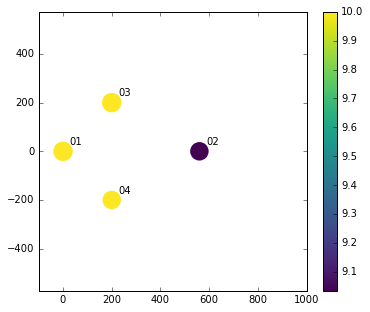

In [9]:
varout=out_py_gcl_v0.u_wt#p_wt/1e6
    
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=varout,
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
ax.axis('equal')
ax.set_xlim([-100, 1000])
#ax.set_ylim([-500, 500])

In [22]:
# Inputs
WS=10.0*np.ones([wf.nWT])+np.random.normal(loc=0.0, scale=0.25, size=[wf.nWT])
WD=285*np.ones([wf.nWT])+np.random.normal(loc=0.0, scale=3., size=[wf.nWT])
TI=0.1*np.ones([wf.nWT])+np.random.normal(loc=0.0, scale=0.02, size=[wf.nWT])
version = 'py_gcl_v0' #'fort_gclm_s' # 

# Run the models
results=gcl(WS=WS, WD=WD, TI=TI, version=version)
results.p_wt.sum()

4984990.3598591276

(-50, 1000)

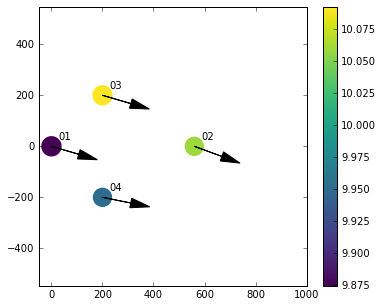

In [23]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=WS,
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
    ax.arrow(x=wf.xyz[0,i],
          y=wf.xyz[1,i],
          dx=0.5*wf.R[1]*WS[i]*np.cos(np.deg2rad(270-WD[i])),
          dy=0.5*wf.R[1]*WS[i]*np.sin(np.deg2rad(270-WD[i])),
          head_length=2*wf.R[1],head_width=wf.R[1],
          length_includes_head=True,
          fc='k',ec='k',
         )
ax.axis('equal')
ax.set_xlim([-50, 1000])
#ax.set_ylim([-400, 400])


(-100, 1000)

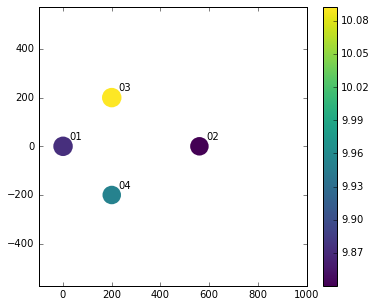

In [24]:
varout=results.u_wt#p_wt/1e6

fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
circles(x=wf.xyz[0,:],
        y=wf.xyz[1,:],
        s=np.array(wf.R),
        c=varout,
        cmap=plt.cm.viridis,lw=0,
        )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i]+0.7*np.array([wf.R[i],wf.R[i]]))
ax.axis('equal')
ax.set_xlim([-100, 1000])
#ax.set_ylim([-500, 500])

In [25]:
WD = (np.arange(-50,50)+270.)#np.linspace(-50,50,200)+270
WS = 10.

In [26]:
P_rat_py_v0 = []
P_rat_py_v1 = []
P_rat_fgcl = []
P_rat_fgclm_s = []
P_rat_fgclm = []
P_rat_fgclm_rdn = []
for wd in WD:      
    out = gcl(WF=wf, WS=WS, WD=wd, TI=0.1, version='fort_gcl')
    P_rat_fgcl = np.append(P_rat_fgcl,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WF=wf, WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='fort_gclm_s')
    P_rat_fgclm_s = np.append(P_rat_fgclm_s,out.p_wt[1]/out.p_wt[0])
  
    #out = gcl(WF=wf, WS=WS*np.ones([wf.nWT]), WD=wd+np.random.normal(loc=0.0, scale=2, size=[wf.nWT]), 
    #          TI=0.1*np.ones([wf.nWT]), version='fort_gclm_s')
    #P_rat_fgclm_rdn = np.append(P_rat_fgclm_rdn,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v1')
    P_rat_py_v1 = np.append(P_rat_py_v1,out.p_wt[1]/out.p_wt[0])

    out = gcl(WF=wf, WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v0')
    P_rat_py_v0 = np.append(P_rat_py_v0,out.p_wt[1]/out.p_wt[0])

In [27]:
WDm = WD.reshape([-1,1])*np.ones([1,wf.nWT])
out = gcl(WF=wf, WS=WS*np.ones_like(WDm), WD=WDm, TI=0.1*np.ones_like(WDm), version='fort_gclm')
P_rat_fgclm = out.p_wt[:,1]/out.p_wt[:,0]

out = gcl(WF=wf, WS=WS*np.ones_like(WDm), WD=WDm, TI=0.1*np.ones_like(WDm), version='fort_gclm_av')
P_rat_fgclm_av = out.p_wt[:,1]/out.p_wt[:,0]

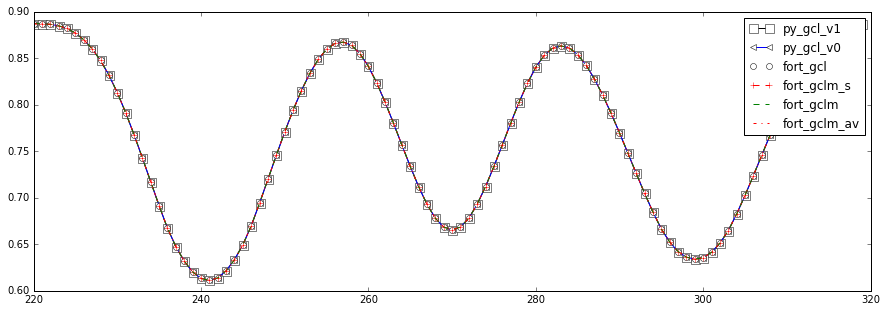

In [28]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)

plt.plot(WD,P_rat_py_v1,'-sk',ms=9,mfc='w',label ='py_gcl_v1')
#plt.plot(-WD,P_rat_py_v1,'x--',label ='py_gcl_v1_inv')

plt.plot(WD,P_rat_py_v0,'-<b',mfc='w',label ='py_gcl_v0')
#plt.plot(-WD,P_rat_py_v0,'-',label ='py_gcl_v0_inv')

plt.plot(WD,P_rat_fgcl,'o',mec='k',mfc='w',label ='fort_gcl')
#plt.plot(-WD,P_rat_fgcl,'+--',label ='fort_gcl')

plt.plot(WD,P_rat_fgclm_s,'--+r',label ='fort_gclm_s')
#plt.plot(-WD,P_rat_fgclm_s,'.-',label ='fort_gclm_s')

plt.plot(WD,P_rat_fgclm,'--',ms=9,mfc='w',label ='fort_gclm')
#plt.plot(-WD,P_rat_fgclm,'.-',label ='fort_gclm')

plt.plot(WD,P_rat_fgclm,'-.',ms=9,mfc='w',label ='fort_gclm_av')
#plt.plot(-WD,P_rat_fgclm,'.-',label ='fort_gclm')

#plt.plot(WD,P_rat_fgclm_rdn,'o',label ='fort_gclm_s_rdn')


plt.legend(loc=1)
ax = plt.gca()